<a href="https://colab.research.google.com/github/Max280201/TrafficSignCV/blob/main/TrafficSignRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Introduction

Aufgabe: Erkennung von Verkehrsschildern und -zeichen in einem Deep Learning Model erlernen
Verwendung von Deep Learning Frameworks wie Keras, TensorFlow, YOLO o. ä. 

Bereich: Machine & Deep Learning  im autonomen Fahren

As part of the Integrationsseminar our task was to implement Deep Learning Models for detecting and recognizing traffic signs. Therefore we built a combination of two independent models. The first model is for detecting the traffic signs and the second model for recognizing/interpreting the dected traffic signs. For training the Neural Networks (based on Tensorflow) we combined two German Traffic Sign data sets from Kaggle.

# 2 Setup

## 2.1 Imports

In [ ]:
from google.colab import drive

import matplotlib.pyplot as plt

import tensorflow_datasets as tfds
import glob
from PIL import Image
# imports
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import seaborn as sns
import os 
import cv2

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.__version__

'2.9.2'

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


## 2.2 Configuration

## 2.3 Import Data

* prerequisites: personal access token for kaggle is stored in an kaggle.json file in the root dir
  * not uploading the kaggle-json file allows to skip the downloading and unzipping
* will download the dataset and store it unzipped in google drive, data import may be commented out after the first time
* will lead to following directories:
  * GTSDB
    * data_dir: TODO
    * train: data_dir+TODO
    * test: data_dir+TODO
  * GTSRB
    * data_dir: 'drive/MyDrive/input/'
    * train: data_dir+'TrainIJCNN2013/TrainIJCNN2013'
    * test:  data_dir+'TestIJCNN2013/TestIJCNN2013Download'


### 2.3.1 GTSDB (Object Detection Data)

In [ ]:
# ! pip install kaggle
# ! mkdir -p ~/.kaggle/
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle datasets download -d safabouguezzi/german-traffic-sign-detection-benchmark-gtsdb
# ! unzip -n german-traffic-sign-detection-benchmark-gtsdb.zip -d drive/MyDrive/GTSDB

### 2.3.2 GTSRB (Image Classification Data)


In [ ]:
# ! pip install kaggle
# ! mkdir -p ~/.kaggle/
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
# ! unzip -n gtsrb-german-traffic-sign.zip -d drive/MyDrive/GTSRB


### 2.3.2 v2 GTSRB (Image Classification Data)


In [ ]:
! pip install kaggle
! mkdir -p ~/drive/MyDrive/
! cp kaggle.json ~/drive/MyDrive/
! chmod 600 ~/drive/MyDrive/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install kaggle
! mkdir -p ~/.kaggle/
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
! unzip -n gtsrb-german-traffic-sign.zip -d GTSRB

Streaming output truncated to the last 5000 lines.
  inflating: GTSRB/train/5/00005_00053_00010.png  
  inflating: GTSRB/train/5/00005_00053_00011.png  
  inflating: GTSRB/train/5/00005_00053_00012.png  
  inflating: GTSRB/train/5/00005_00053_00013.png  
  inflating: GTSRB/train/5/00005_00053_00014.png  
  inflating: GTSRB/train/5/00005_00053_00015.png  
  inflating: GTSRB/train/5/00005_00053_00016.png  
  inflating: GTSRB/train/5/00005_00053_00017.png  
  inflating: GTSRB/train/5/00005_00053_00018.png  
  inflating: GTSRB/train/5/00005_00053_00019.png  
  inflating: GTSRB/train/5/00005_00053_00020.png  
  inflating: GTSRB/train/5/00005_00053_00021.png  
  inflating: GTSRB/train/5/00005_00053_00022.png  
  inflating: GTSRB/train/5/00005_00053_00023.png  
  inflating: GTSRB/train/5/00005_00053_00024.png  
  inflating: GTSRB/train/5/00005_00053_00025.png  
  inflating: GTSRB/train/5/00005_00053_00026.png  
  inflating: GTSRB/train/5/00005_00053_00027.png  
  inflating: GTSRB/train/5/0000

### 2.3.3 Cleanup

In [ ]:
# ! rm kaggle.json
# ! rm ~/.kaggle/kaggle.json
# ! rm german-traffic-sign-detection-benchmark-gtsdb.zip
# ! rm gtsrb-german-traffic-sign.zip

### 2.3.4 Copy Folders from Drive

In [ ]:
# ! mkdir -p data/
# ! cp -R -u -p drive/MyDrive/GTSDB data/GTSDB
# ! mkdir -p data/
# ! cp -R -u -p drive/MyDrive/GTSRB data/GTSRB

# 3 Data Preparation

## 3.1 Input

### 3.1.1 GTSDB

In [ ]:
# gtsdb_dir = data_dir + 'GTSDB/'
# vsplit=.2 
# IMAGE_SIZE=[224, 224]
# IMAGE_SHAPE=[224,224,3]
# train_model=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range = 0.2,
#                                    horizontal_flip=True,validation_split=vsplit)
# test_model=ImageDataGenerator(rescale=1./255,validation_split=vsplit)
# training_data=train_model.flow_from_directory(gtsdb_dir+'TrainIJCNN2013/TrainIJCNN2013',
#                                                  target_size=IMAGE_SIZE,batch_size=32,
#                                                  class_mode='categorical',subset='training',
#                                                  shuffle=True,seed=123)
# testing_data=test_model.flow_from_directory(gtsdb_dir+'TrainIJCNN2013/TrainIJCNN2013', 
#                                                 target_size=IMAGE_SIZE,batch_size = 32,
#                                                 class_mode='categorical',subset='validation',
#                                                 shuffle=True,seed=123)
# class_dict=training_data.class_indices
# classes=list(class_dict.keys())
# print('LIST OF CLASSES',classes)
# print('CLASS DICTIONARY',class_dict)
# number_of_classes=len(classes)
# print('Number of classes=',number_of_classes)

### 3.1.2 GTSRB

In [ ]:
# gtsrb_dir = data_dir + 'GTSRB/'

# batch_size_classification = 64
# img_height_classification = 30
# img_width_classification = 30

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator()
# df_test = pd.read_csv(gtsrb_dir + "Test.csv")
# df_test['Path']=df_test.Path.apply(lambda x: x[-9:])
# #df_test['ClassId']=df_test.ClassId.astype(str)

# testDatagen = datagen.flow_from_dataframe(df_test, directory=gtsrb_dir+'Train', x_col='Path', y_col='ClassId',
#                                           target_size=(img_height_classification, img_width_classification), 
#                                           class_mode = "raw", 
#                                           shuffle=True,
#                                           validation_split=0.2,
#                                           batch_size = batch_size_classification, 
#                                           subset='training')

In [ ]:
# train_val_ds = tf.keras.utils.image_dataset_from_directory(
#   gtsrb_dir + 'Train',
#   validation_split=0.2,
#   subset='training',
#   seed=42,
#   image_size=(img_height_classification, img_width_classification),
#   batch_size=batch_size_classification
# )


In [ ]:
data_dir = 'GTSRB'
train_path = data_dir + '/Train'
test_path = data_dir

# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

In [ ]:
NUM_CATEGORIES = len(os.listdir(train_path))

In [ ]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

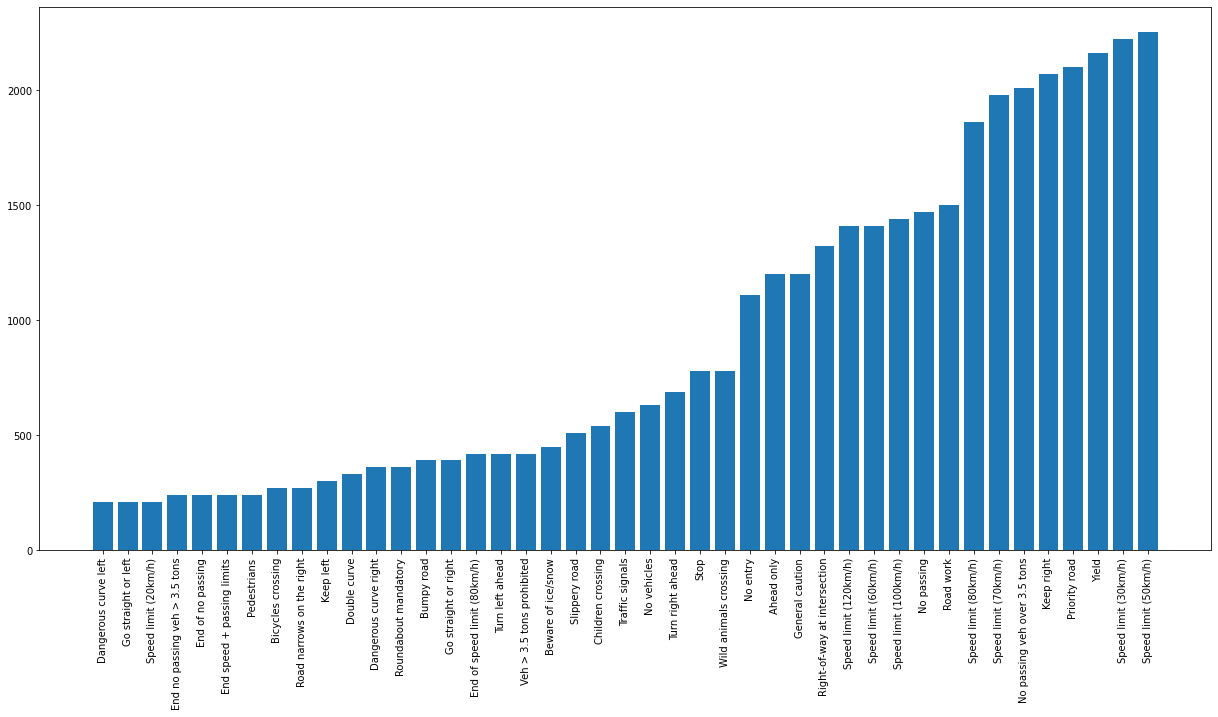

In [ ]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

In [ ]:
image_data = []
image_labels = []
NUM_CATEGORIES = len(os.listdir(data_dir+'/Train'))

for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 30, 30, 3) (39209,)


In [ ]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

In [ ]:
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
y_test = np.array(labels)

In [ ]:
# train_size = int(train_val_ds.__len__().numpy() * 0.75)

# train_ds = train_val_ds.take(train_size)
# val_ds = train_val_ds.skip(train_size)

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator()
# df_test = pd.read_csv(gtsrb_dir + "Train.csv")
# #df_test['Path']=df_test.Path.apply(lambda x: x[-9:])
# df_test['ClassId']=df_test.ClassId.astype(str)

# testDatagen = datagen.flow_from_dataframe(df_test, directory=gtsrb_dir, x_col='Path', y_col='ClassId',
#                                           target_size=(img_height_classification, img_width_classification), 
#                                           class_mode = "categorical", 
#                                           shuffle=True,
#                                           validation_split=0.2,
#                                           batch_size = batch_size_classification, 
#                                           subset='validation')

In [ ]:
# test_ds = tf.keras.utils.image_dataset_from_directory(
#   gtsrb_dir + 'Train',
#   validation_split=0.2,
#   subset='validation',
#   seed=42,
#   image_size=(img_height_classification, img_width_classification),
#   batch_size=batch_size_classification
# )

In [ ]:
np.unique(image_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42])

In [ ]:
class_numbers = np.unique(image_labels)

In [ ]:
class_names = {
    0:'Speed limit (20km/h)',
    1:'Speed limit (30km/h)', 
    2:'Speed limit (50km/h)',
    3:'Speed limit (60km/h)', 
    4:'Speed limit (70km/h)', 
    5:'Speed limit (80km/h)', 
    6:'End of speed limit (80km/h)', 
    7:'Speed limit (100km/h)', 
    8:'Speed limit (120km/h)', 
    9:'No passing', 
    10:'No passing veh over 3.5 tons', 
    11:'Right-of-way at intersection', 
    12:'Priority road', 
    13:'Yield', 
    14:'Stop', 
    15:'No vehicles', 
    16:'Veh > 3.5 tons prohibited', 
    17:'No entry', 
    18:'General caution', 
    19:'Dangerous curve left', 
    20:'Dangerous curve right', 
    21:'Double curve', 
    22:'Bumpy road', 
    23:'Slippery road', 
    24:'Road narrows on the right', 
    25:'Road work', 
    26:'Traffic signals', 
    27:'Pedestrians', 
    28:'Children crossing', 
    29:'Bicycles crossing', 
    30:'Beware of ice/snow',
    31:'Wild animals crossing', 
    32:'End speed + passing limits', 
    33:'Turn right ahead', 
    34:'Turn left ahead', 
    35:'Ahead only', 
    36:'Go straight or right', 
    37:'Go straight or left', 
    38:'Keep right', 
    39:'Keep left', 
    40:'Roundabout mandatory', 
    41:'End of no passing', 
    42:'End no passing veh > 3.5 tons' 
}

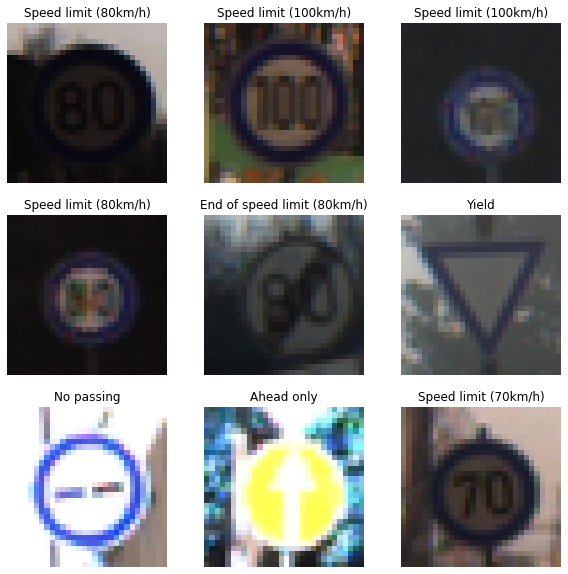

In [ ]:
plt.figure(figsize=(10, 10))
for counter in range(9):
  ax = plt.subplot(3, 3, counter + 1)
  plt.imshow(X_train[counter].astype("uint8"))
  plt.title(class_names[class_numbers[y_train[counter]]])
  plt.axis("off")


In [ ]:
# AUTOTUNE = tf.data.AUTOTUNE

# train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
# test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.InputLayer(input_shape=(img_height_classification, img_width_classification, 3)),
  # preprocessing layer: will be ignored during testing/ prod
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.1),
  # layers.RandomCrop(img_height_classification - 2, img_width_classification - 2),
  # layers.RandomTranslation(0.1, 0.1),
  # processing layer
  layers.Rescaling(1./255),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(padding='same'),
  layers.BatchNormalization(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(padding='same'),
  layers.BatchNormalization(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(padding='same'),
  layers.BatchNormalization(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation (RandomRota  (None, 30, 30, 3)        0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 30, 30, 3)         0         
                                                                 
 rescaling (Rescaling)       (None, 30, 30, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                      

In [ ]:
epochs=100

early_stopping = keras.callbacks.EarlyStopping(patience=10,
                                               verbose=2,
                                               restore_best_weights=True)
    
history = model.fit(
  X_train, y_train, 
  validation_data=(X_val, y_val),
  epochs=epochs,
  callbacks=early_stopping
)

Epoch 1/100
858/858 [==============================] - 22s 15ms/step - loss: 1.9589 - accuracy: 0.4055 - val_loss: 0.9004 - val_accuracy: 0.6910
Epoch 2/100
858/858 [==============================] - 12s 14ms/step - loss: 0.5338 - accuracy: 0.8204 - val_loss: 0.2814 - val_accuracy: 0.9078
Epoch 3/100
858/858 [==============================] - 11s 13ms/step - loss: 0.2540 - accuracy: 0.9195 - val_loss: 0.3970 - val_accuracy: 0.8761
Epoch 4/100
858/858 [==============================] - 12s 14ms/step - loss: 0.1753 - accuracy: 0.9450 - val_loss: 0.2640 - val_accuracy: 0.9140
Epoch 5/100
858/858 [==============================] - 13s 15ms/step - loss: 0.1498 - accuracy: 0.9530 - val_loss: 0.1719 - val_accuracy: 0.9519
Epoch 6/100
858/858 [==============================] - 12s 14ms/step - loss: 0.1424 - accuracy: 0.9560 - val_loss: 0.1281 - val_accuracy: 0.9574
Epoch 7/100
858/858 [==============================] - 15s 17ms/step - loss: 0.1174 - accuracy: 0.9638 - val_loss: 0.1406 - val_ac

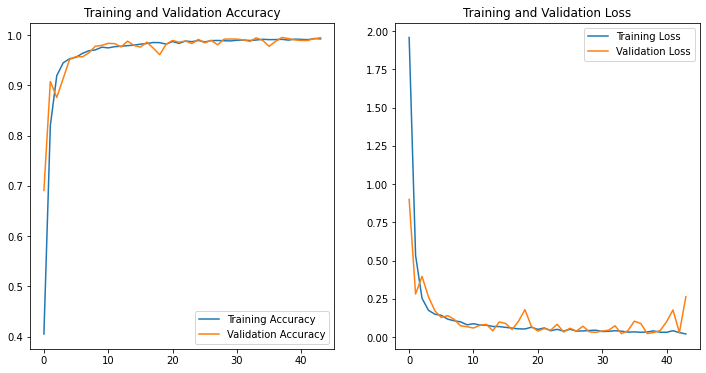

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
model.evaluate(X_test, y_test)

395/395 [==============================] - 2s 5ms/step - loss: 0.1864 - accuracy: 0.9645


[0.1864253431558609, 0.9645289182662964]

In [ ]:
train_ds = (X_train, y_train)
val_ds = (X_val, y_val)
test_ds = (X_test, y_test)

In [ ]:
# save model
!mkdir -p drive/MyDrive/checkpoints
model.save_weights('drive/MyDrive/checkpoints/vgg16_model_acc_99_model_weights')
model.save('drive/MyDrive/checkpoints/vgg16_model_acc_99_model')

# 4 Evaluation

In [ ]:
# X_test, y_test = np.array([]), np.array([])
# for images, labels in val_ds:
#   if len(X_test) != 0:
#     X_test = np.append(X_test, images, axis=0)
#     y_test = np.append(y_test, labels, axis=0)
#   else:
#     X_test = images
#     y_test = labels
# X_train, y_train = np.array([]), np.array([])
# for images, labels in train_ds:
#   if len(X_train) != 0:
#     X_train = np.append(X_train, images, axis=0)
#     y_train = np.append(y_train, labels, axis=0)
#   else:
#     X_train= images
#     y_train = labels

In [ ]:
X_test.shape

(0,)

In [ ]:
# X_test, y_test = [images for images, labels in val_ds], [labels for images, labels in val_ds]
# X_train, y_train = [images for images, labels in train_ds], [labels for images, labels in train_ds]
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
wrong_predicted_images = np.array([])
for i in range(len(y_test)):
  if y_test[i] != y_pred_classes[i]:
     if len(wrong_predicted_images)!=0:
       wrong_predicted_images = np.append(wrong_predicted_images, X_test[i].reshape((-1, 30, 30, 3)), axis=0)
       wrong_predicted_ylabel = np.append(wrong_predicted_ylabel, y_pred_classes[i])
     else:
       wrong_predicted_images = X_test[i].reshape((-1, 30, 30, 3))
       wrong_predicted_ylabel = y_pred_classes[i]

395/395 [==============================] - 1s 3ms/step


In [ ]:
y_pred_classes.shape, y_test.shape, y_train.shape, X_train.shape, X_test.shape, wrong_predicted_images.shape, wrong_predicted_ylabel.shape

((12630,),
 (12630,),
 (27446,),
 (27446, 30, 30, 3),
 (12630, 30, 30, 3),
 (448, 30, 30, 3),
 (448,))

In [ ]:
# y_pred_classes = np.argmax(y_pred, axis=1)
# y_pred_classes.shape, len(X_test), len(y_test)

In [ ]:
a = confusion_matrix(y_test, y_pred_classes)

# fill diagonal
np.fill_diagonal(a, False)

# columns with at least one non-zero
cols = a.any(axis=0)

# rows with at least one non-zero
rows = a.any(axis=1)

# filter columns and rows that have values above one threshold
threshold = 1.5
rows_nb, col_nb = a.shape
rows_above_threshold = [col for col in range(col_nb) \
    if any([a[row][col] >= threshold for row in range(rows_nb)])]
columns_above_threshold = [row for row in range(rows_nb) \
    if any([a[row][col] >= threshold for col in range(col_nb)])]

In [ ]:
a = pd.DataFrame(a, index=class_names.values(), columns=class_names.values())
# a.iloc[rows_above_threshold+columns_above_threshold, rows_above_threshold+columns_above_threshold]
a.iloc[columns_above_threshold, rows_above_threshold]

,Speed limit (30km/h),Speed limit (50km/h),Speed limit (60km/h),Speed limit (70km/h),Speed limit (80km/h),Speed limit (100km/h),Speed limit (120km/h),Right-of-way at intersection,Yield,Stop,...,Turn right ahead,Turn left ahead,Ahead only,Go straight or right,Go straight or left,Keep right,Keep left,Roundabout mandatory,End of no passing,End no passing veh > 3.5 tons
Speed limit (20km/h),0,0,0,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Speed limit (50km/h),3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Speed limit (60km/h),0,2,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Speed limit (70km/h),3,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Speed limit (80km/h),0,1,3,0,0,6,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
End of speed limit (80km/h),0,0,0,0,9,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
Speed limit (100km/h),0,0,1,0,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
No passing veh over 3.5 tons,1,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Right-of-way at intersection,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Priority road,0,0,0,0,0,0,0,2,18,0,...,0,0,0,0,0,17,0,0,0,4


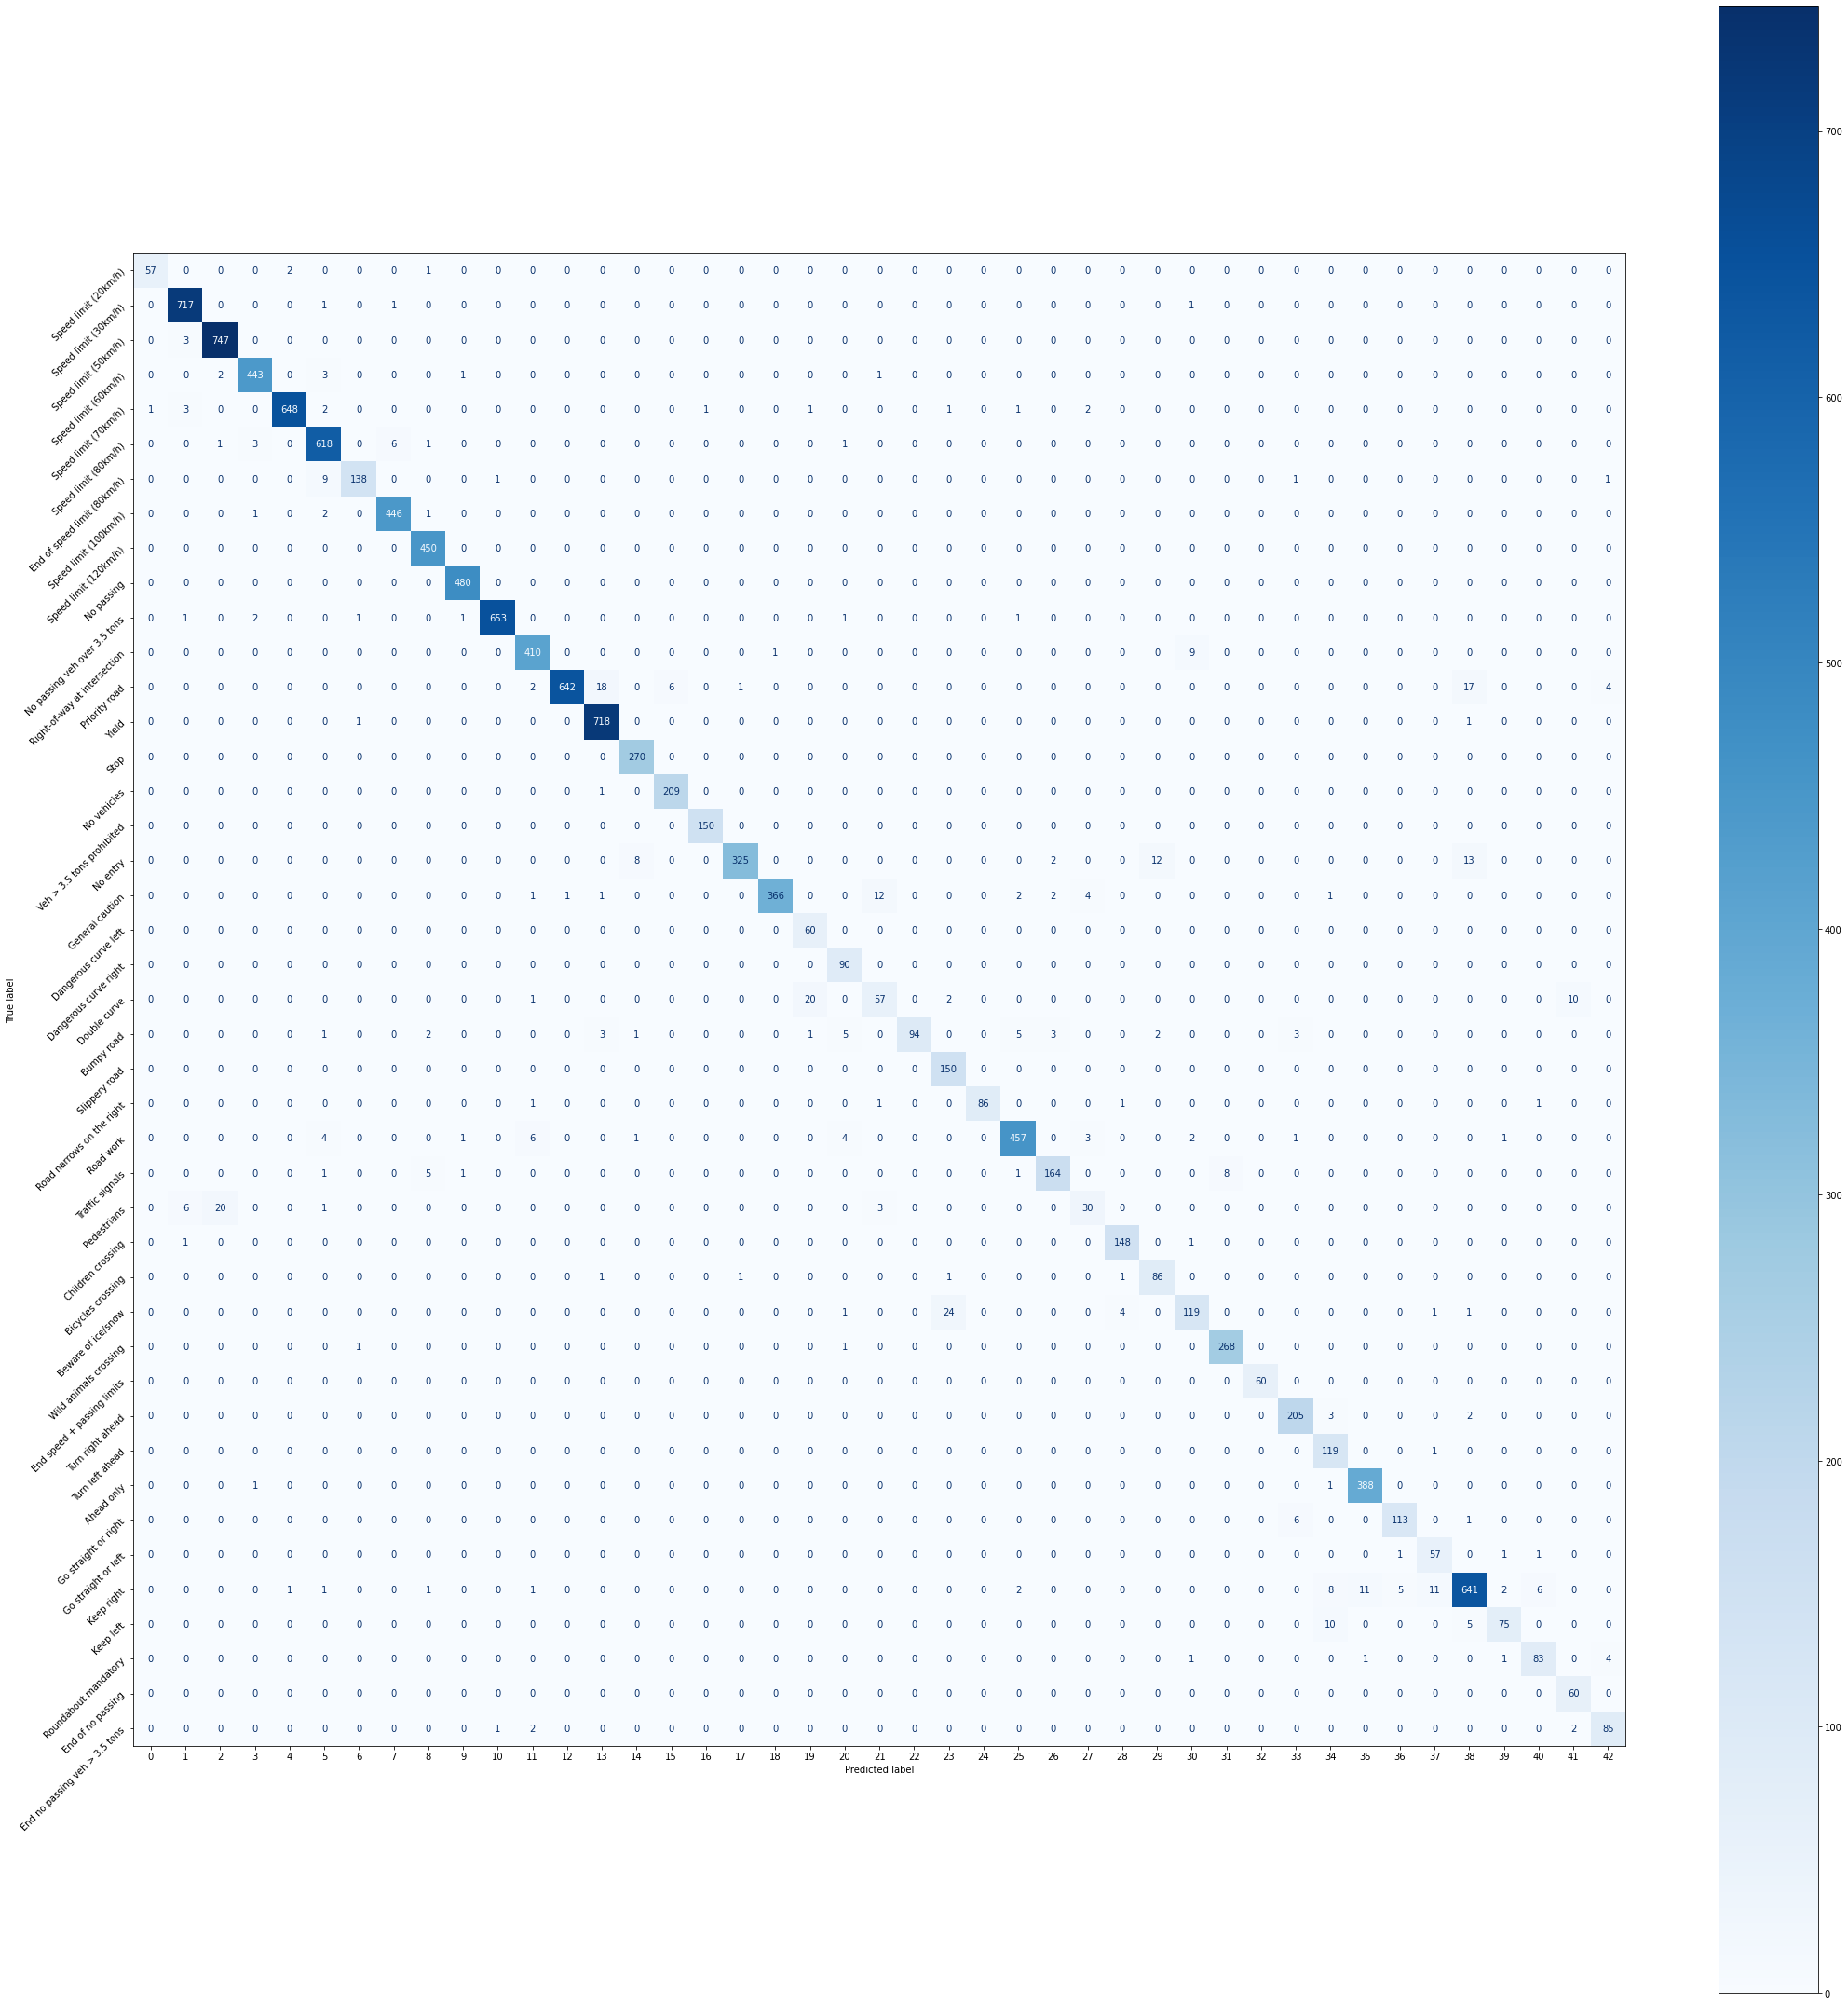

In [ ]:
fig, ax = plt.subplots(figsize=(30,30))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_classes, cmap="Blues", ax=ax)
# sns.heatmap(a, cmap="Blues", ax=ax)
ax.set_yticklabels(list(class_names.values()), rotation=45)
#ax.set_xticklabels(list(class_names.values()), rotation=45)
fig.set_tight_layout(True)
plt.show()

In [ ]:
from pprint import pprint
pprint(classification_report(y_test, y_pred_classes))

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.98      0.95      0.97        60\n'
 '           1       0.98      1.00      0.99       720\n'
 '           2       0.97      1.00      0.98       750\n'
 '           3       0.98      0.98      0.98       450\n'
 '           4       1.00      0.98      0.99       660\n'
 '           5       0.96      0.98      0.97       630\n'
 '           6       0.98      0.92      0.95       150\n'
 '           7       0.98      0.99      0.99       450\n'
 '           8       0.98      1.00      0.99       450\n'
 '           9       0.99      1.00      1.00       480\n'
 '          10       1.00      0.99      0.99       660\n'
 '          11       0.97      0.98      0.97       420\n'
 '          12       1.00      0.93      0.96       690\n'
 '          13       0.97      1.00      0.98       720\n'
 '          14       0.96      1.00      0.98       270\n'
 '          15       0.97      1.00      0.98     

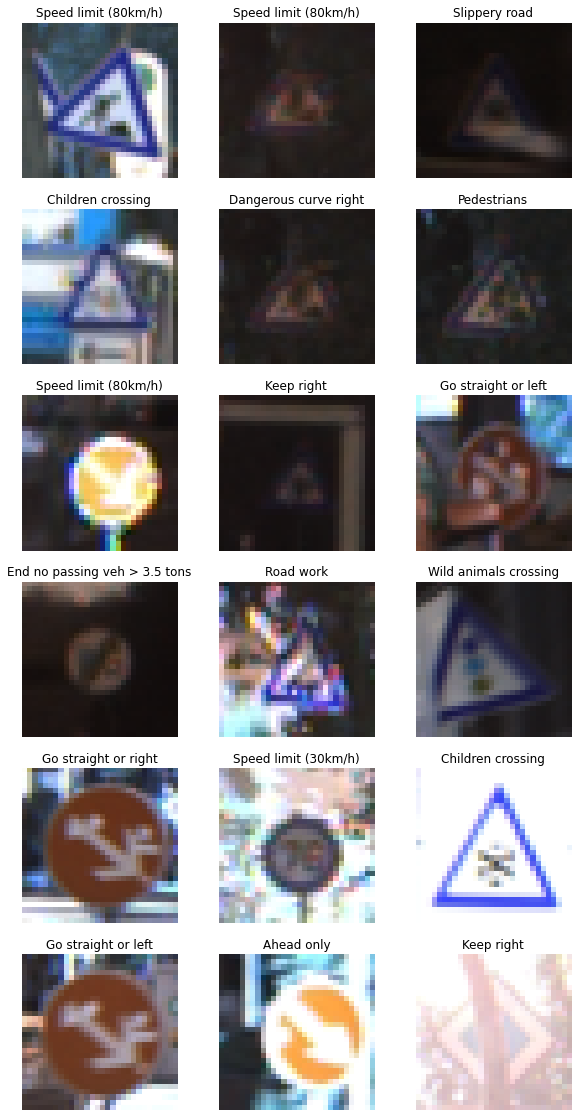

In [ ]:
plt.figure(figsize=(10, 20))
plt.title("Wrong predicted traffic signs")
for i in range(min(len(wrong_predicted_images), 18)):
    ax = plt.subplot((min(len(wrong_predicted_images), 18)-1)//3+1, 3, i + 1)
    plt.imshow(wrong_predicted_images[i].astype("uint8"))
    plt.title(class_names[wrong_predicted_ylabel[i]])
    plt.axis("off")

# 5 Compare Models 

In [ ]:
# load models
# model_additional_pp_layers = load_model('drive/MyDrive/checkpoints/vgg16_model_acc_99_additional_pp_layers_model')
model_basic_vgg16 = load_model('drive/MyDrive/checkpoints/vgg16_model_acc_99_model')

In [ ]:
test_ds_labels = y_test
#  pd.read_csv(gtsrb_dir + "Test.csv").sort_values(by="Path").loc[:,"ClassId"].to_numpy()

## 5.1 first possibility for loading the train data. Idea:
* copy the pictures to a new folder
* use image_dataset_from_directory function like above 
* extract X_test data and load y_test on its own

In [ ]:
# ! mkdir -p data/GTSRB/Test_load/load_images
# ! cp -R -u -p data/GTSRB/Test data/GTSRB/Test_load/load_images

In [ ]:
# test_ds = tf.keras.utils.image_dataset_from_directory(
#   gtsrb_dir + 'Test_load/load_images/',
#   shuffle = False,
#   #labels = None,
#  # validation_split=0.2,
#  # subset='training',
#  # seed=42,
#   image_size=(img_height_classification, img_width_classification),
#   batch_size=64 #len(test_ds_labels)
# )

In [ ]:
# AUTOTUNE = tf.data.AUTOTUNE

# test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# X_test = np.array([])
# for images, labels in test_ds:
#   images = np.array(images)
#   # images = [cv2.normalize(image, None, alpha = 1, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F) for image in images]
#   if len(X_test) != 0:
#     X_test = np.append(X_test, images, axis=0)
#     y_test = np.append(y_test, labels, axis=0)
#   else:
#     X_test= images
#     y_test = labels

In [ ]:
# norm_image.max(), norm_image.min(), norm_image.std(), norm_image.mean()

In [ ]:
for i in range(0, 1000, 10):
  print(X_test[i].max(), X_test[i].min(), X_test[i].std(), X_test[i].mean())

In [ ]:
X_test[0][0]

In [ ]:
plt.imshow(X_test[0].astype("uint8"))

In [ ]:
# score_mapp = model_additional_pp_layers.evaluate(X_test, test_ds_labels)
score_basic_vgg16 = model_basic_vgg16.evaluate(np.concatenate([x for x, y in test_ds], axis=0), test_ds_labels)

In [ ]:
# pred_mapp = model_additional_pp_layers.predict(X_test)
pred_basic_vgg16 = model_basic_vgg16.predict(X_test)

## 5.2 second possibility for loading the train data. Idea:
* use flow_from_dataframe function to load labels and corresponding images
* get X_test data out of iterator and compare to labels (reason: classes could not be encoded to int like above)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator()
df_test = pd.read_csv(gtsrb_dir + "Test.csv")
df_test['Path']=df_test.Path.apply(lambda x: x[-9:])
#df_test['ClassId']=df_test.ClassId.astype(str)

testDatagen = datagen.flow_from_dataframe(df_test, directory=gtsrb_dir+'Test', x_col='Path', y_col='ClassId',
                                          target_size=(img_height_classification, img_width_classification), 
                                          class_mode = None, 
                                          shuffle=False,
                                          batch_size = len(df_test), 
                                          subset='training')

In [ ]:
X_test = np.array(testDatagen[0])
X_test.shape

In [ ]:
# X_test = np.array([])
# for images in testDatagen:
#   if len(X_test) != 0:
#     X_test = np.append(X_test, images, axis=0)
#   else:
#     X_test = images

In [ ]:
score_mapp = model_additional_pp_layers.evaluate(X_test, test_ds_labels) # alternative: use test data gen directly
score_basic_vgg16 = model_basic_vgg16.evaluate(X_test, test_ds_labels)

In [ ]:
score_mapp = model_additional_pp_layers.evaluate(X_test, test_ds_labels)
score_basic_vgg16 = model_basic_vgg16.evaluate(testDatagen)

In [ ]:
test_pred_classes = np.argmax(pred_basic_vgg16, axis=1)
fig = plt.figure(figsize=(10, 10))
plt.title("test data")
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i].astype("uint8"))
    plt.title(f"True label: {class_names[test_ds_labels[i]]},\n prediction: {class_names[test_pred_classes[i]]}")
    plt.axis("off")
fig.set_tight_layout(True)

In [ ]:
score_mapp = model_additional_pp_layers.evaluate(val_ds)
score_basic_vgg16 = model_basic_vgg16.evaluate(val_ds)

In [ ]:
for i in range(0, 1000, 10):
  print(X_test[i].max(), X_test[i].min(), X_test[i].std(), X_test[i].mean())

In [ ]:
train_ds_first = train_ds.take(1)

In [ ]:
for j in range(0,1000,10):
  for image, labels in train_ds_first.take(j):
    for i in range(1):
      image = np.array(image)
      print(image.max(), image.min(), image.std(), image.mean())

In [ ]:
val_ds_first = val_ds.take(1)

In [ ]:
for j in range(0,1000,10):
  for image, labels in val_ds.take(j):
    for i in range(1):
      image = np.array(image)
      print(image.max(), image.min(), image.std(), image.mean())

In [ ]:
np.array(train_ds_first)